# Data Analysis on `prices.txt`

Before developing a trading strategy, it's essential to understand the underlying data. We'll start by loading the data, examining its structure, and performing some basic statistical analysis and visualizations.

## 1. Load the Price Data

We'll load the price data from `prices.txt` and convert it into a pandas DataFrame for easier manipulation and analysis.


In [10]:
import numpy as np
import pandas as pd

# Load the price data
prices = np.loadtxt('prices.txt')

# Convert to DataFrame for easier analysis
df = pd.DataFrame(prices.T, columns=[f'Instrument_{i}' for i in range(prices.shape[0])])

# Display the first few rows of the DataFrame
print(df.head())


   Instrument_0  Instrument_1  Instrument_2  Instrument_3  Instrument_4  \
0         13.46         13.48         13.47         13.53         13.64   
1         71.65         72.10         72.35         72.51         71.99   
2         48.46         48.52         48.48         48.42         48.40   
3         50.52         50.50         50.62         50.75         50.65   
4         52.10         52.06         51.80         51.66         51.97   

   Instrument_5  Instrument_6  Instrument_7  Instrument_8  Instrument_9  ...  \
0         13.62         13.67         13.79         13.76         13.67  ...   
1         72.35         72.22         71.37         71.02         71.17  ...   
2         48.41         48.39         48.41         48.40         48.41  ...   
3         50.52         50.55         50.57         50.57         50.52  ...   
4         51.93         51.84         52.19         52.13         52.34  ...   

   Instrument_490  Instrument_491  Instrument_492  Instrument_493  \

In [11]:
# Basic statistics
print(df.describe())

       Instrument_0  Instrument_1  Instrument_2  Instrument_3  Instrument_4  \
count     50.000000      50.00000     50.000000     50.000000     50.000000   
mean      40.776600      40.83240     40.836200     40.910200     40.904800   
std       15.991585      16.05154     16.035756     16.094812     16.111745   
min       13.000000      12.95000     12.790000     12.660000     12.620000   
25%       29.947500      30.08000     30.097500     30.072500     30.085000   
50%       42.655000      42.53500     42.360000     42.405000     42.515000   
75%       52.242500      52.39000     52.317500     52.215000     52.322500   
max       71.650000      72.10000     72.350000     72.510000     71.990000   

       Instrument_5  Instrument_6  Instrument_7  Instrument_8  Instrument_9  \
count     50.000000     50.000000     50.000000     50.000000     50.000000   
mean      40.908800     40.926000     40.942200     40.992000     40.959000   
std       16.116257     16.115271     16.088532    

## 2. Plotting the Price Data

We'll plot the price data for the first five instruments to visualize their price movements over time.


<Figure size 1400x700 with 0 Axes>

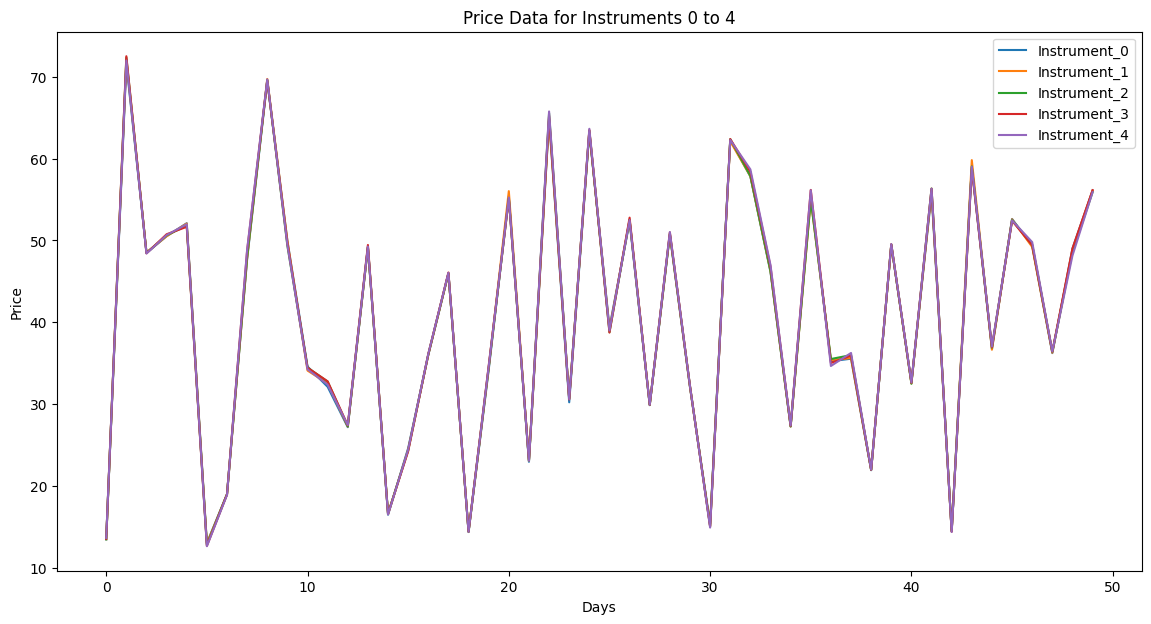

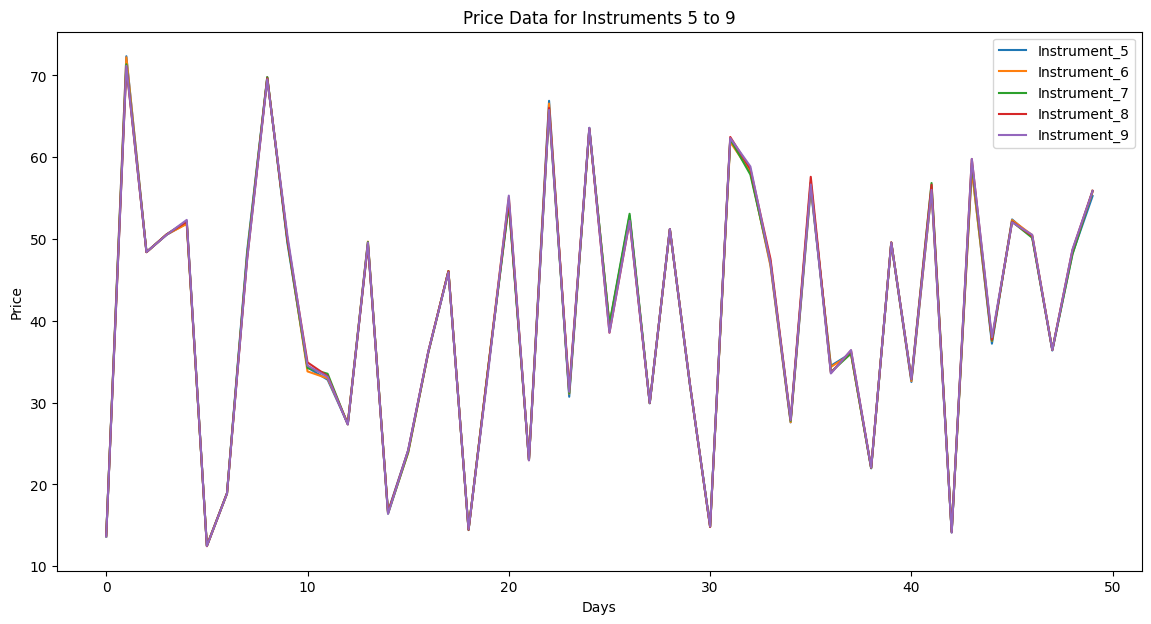

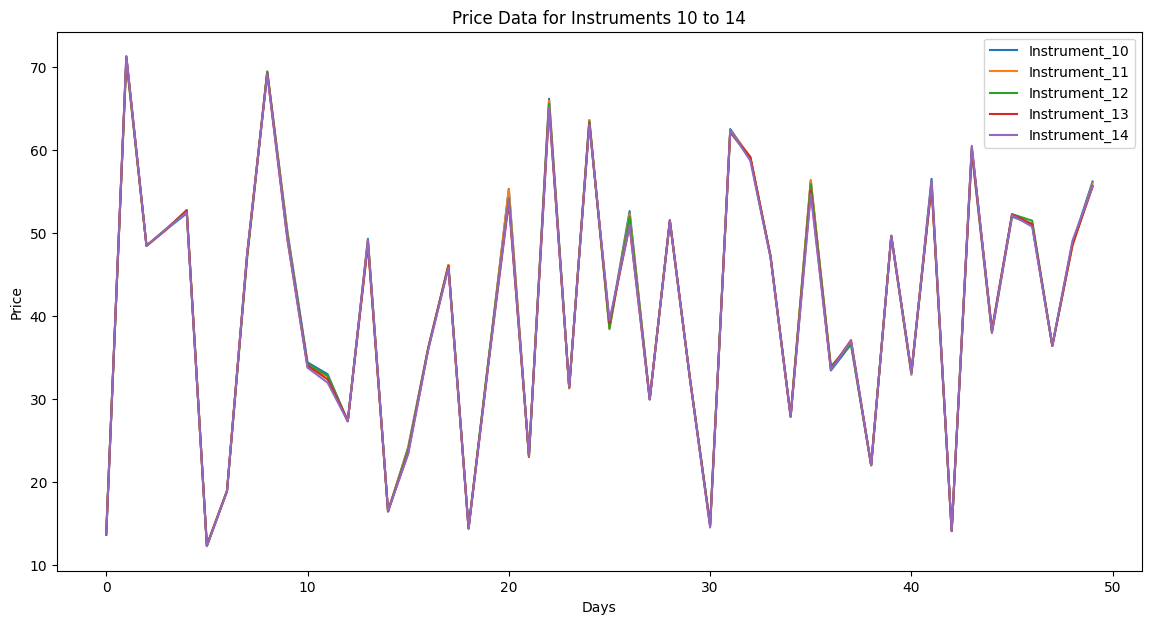

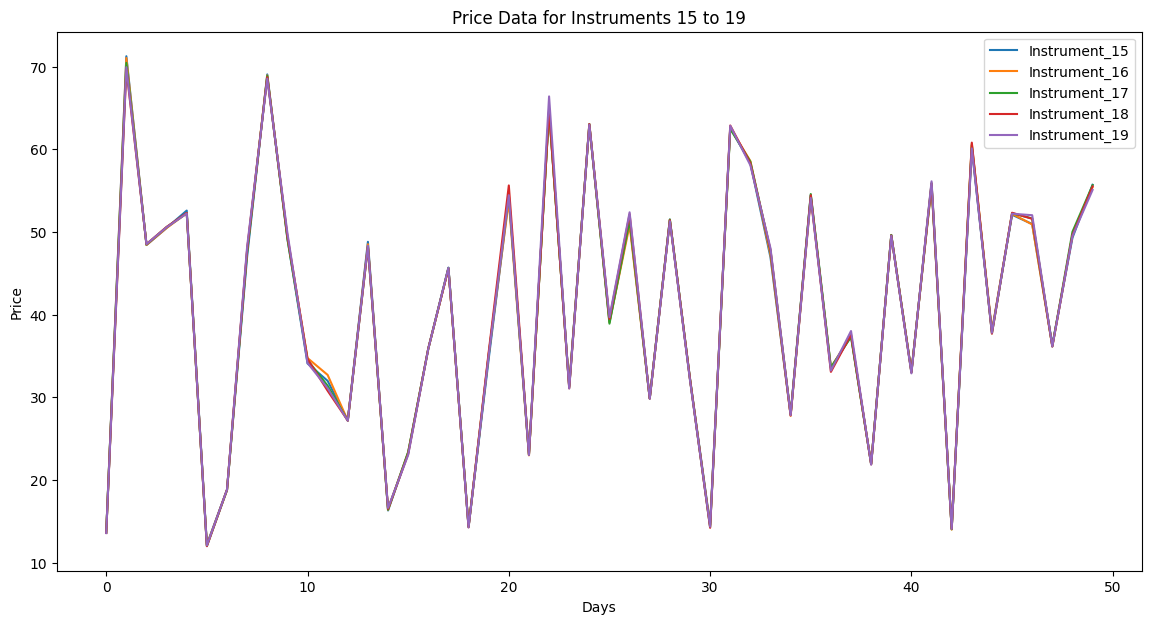

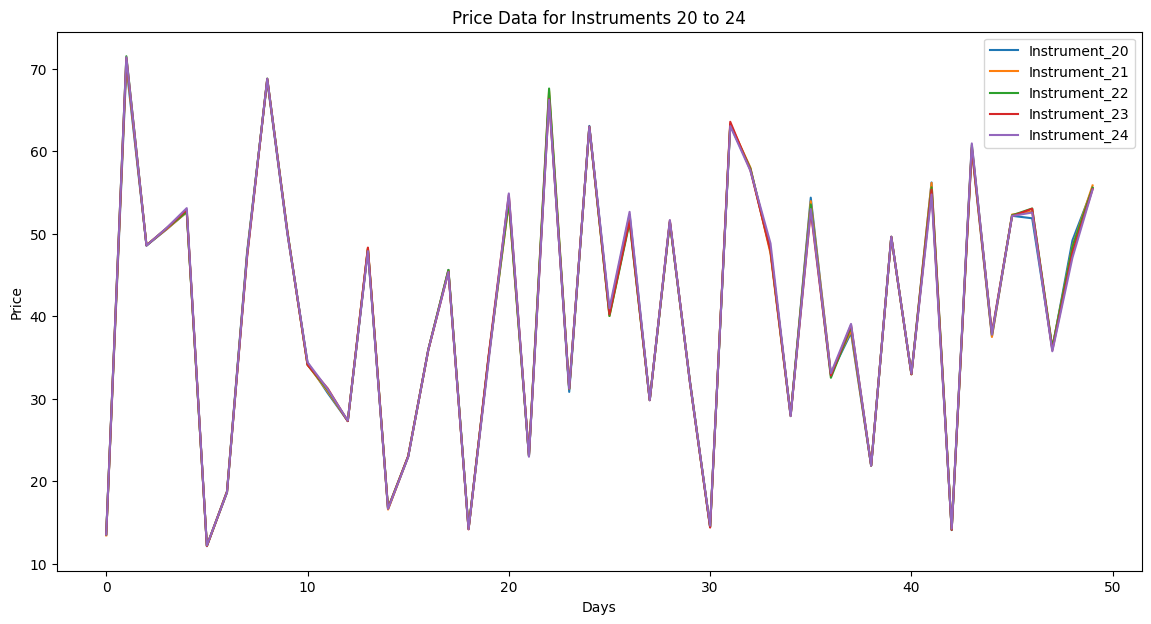

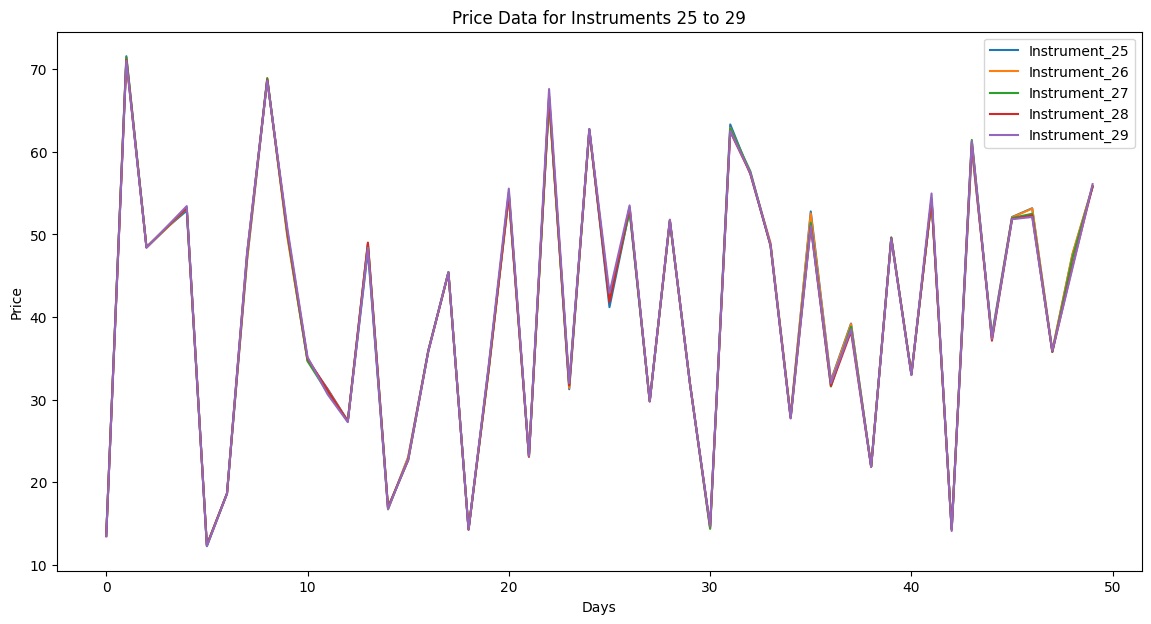

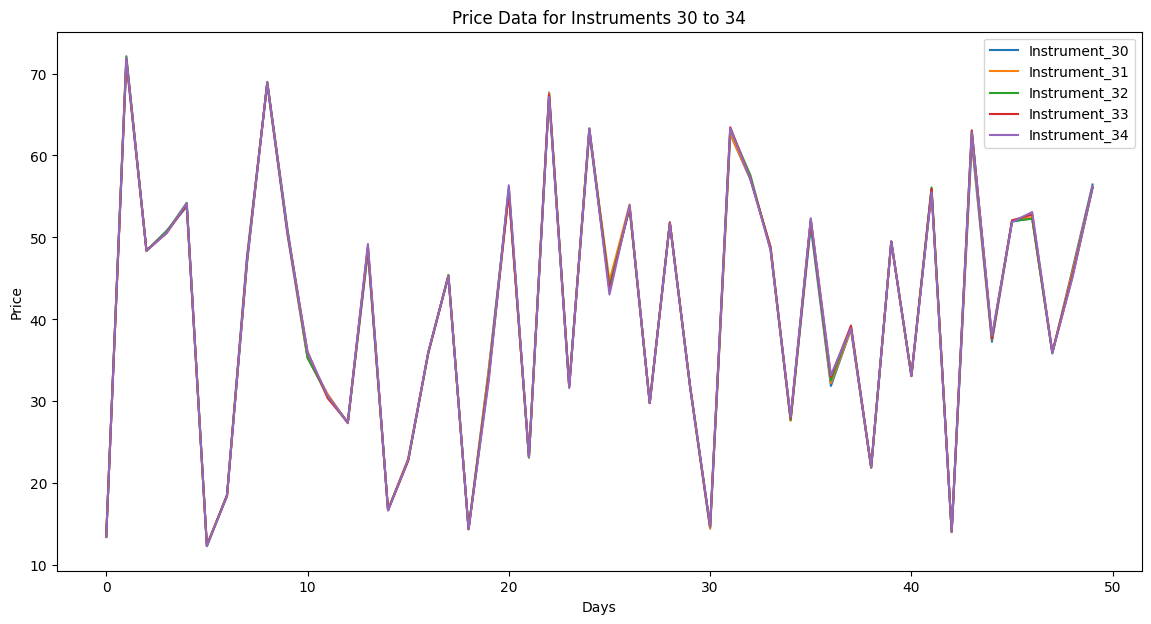

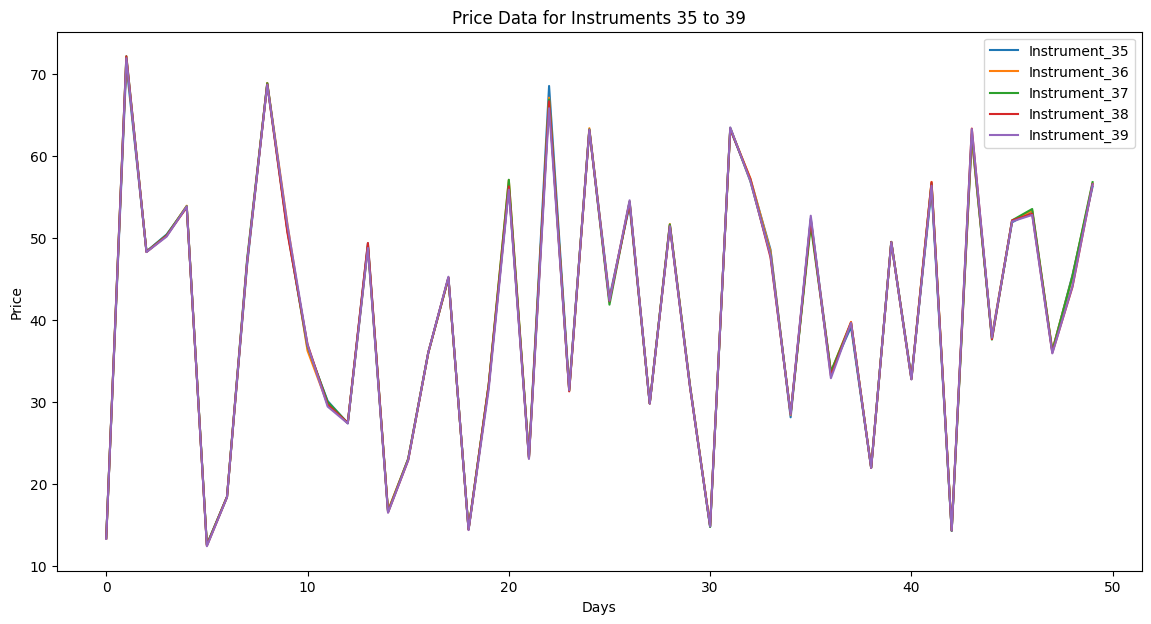

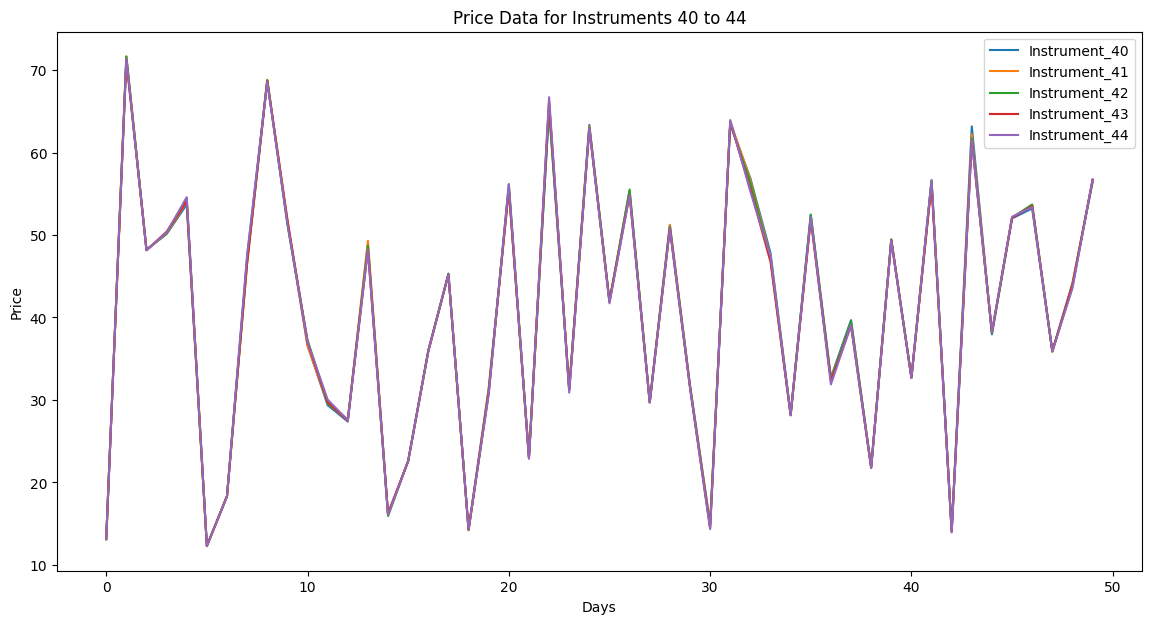

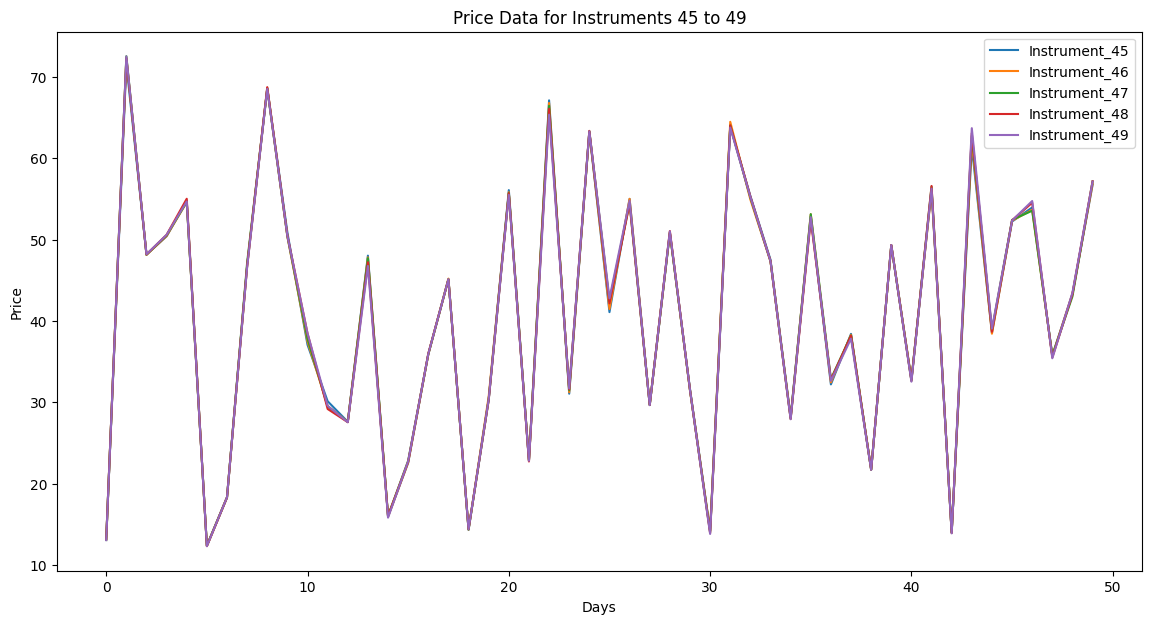

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for i in range(0, 50, 5):
    plt.figure(figsize=(14, 7))
    for j in range(5):
        if i + j < 50:
            plt.plot(df.index, df[f'Instrument_{i+j}'], label=f'Instrument_{i+j}')
    plt.title(f'Price Data for Instruments {i} to {i+4}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


## 3. Calculate Daily Returns

We'll calculate the daily returns for each instrument and plot them for the first five instruments to understand their volatility and daily price changes.


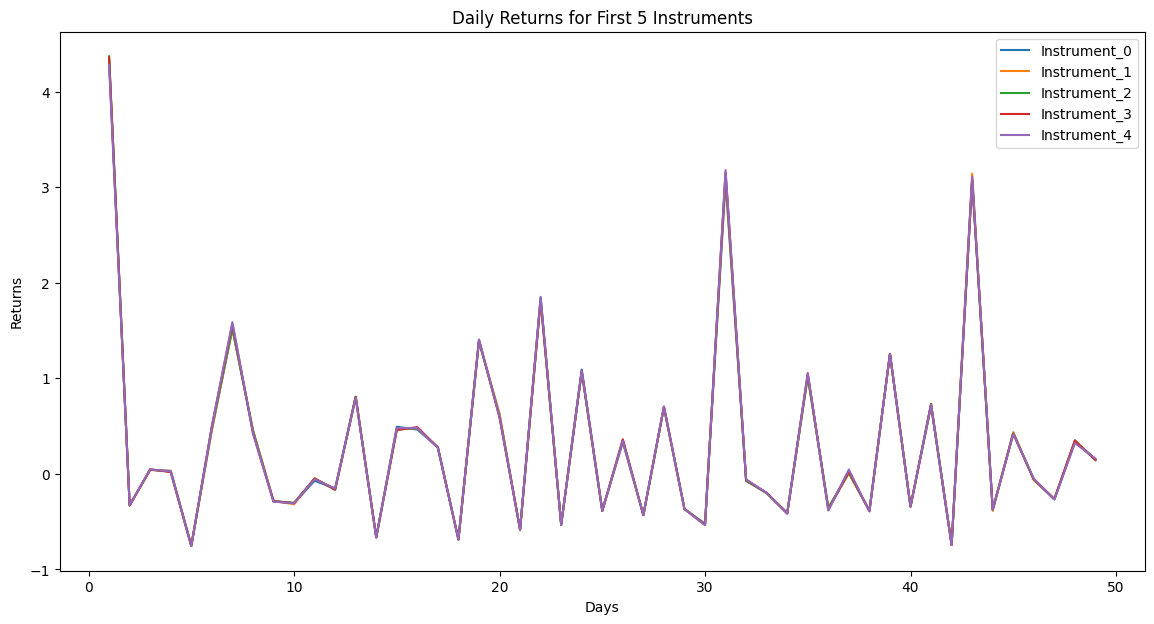

In [13]:
# Calculate daily returns
returns = df.pct_change().dropna()

# Plotting the daily returns for all instruments
for i in range(0, 50, 5):
    plt.figure(figsize=(14, 7))
    for j in range(5):
        if i + j < 50:
            plt.plot(returns.index, returns[f'Instrument_{i+j}'], label=f'Instrument_{i+j}')
    plt.title(f'Daily Returns for Instruments {i} to {i+4}')
    plt.xlabel('Days')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()


## 4. Correlation Matrix

We'll compute and plot the correlation matrix of the returns to see how the different instruments are correlated with each other.


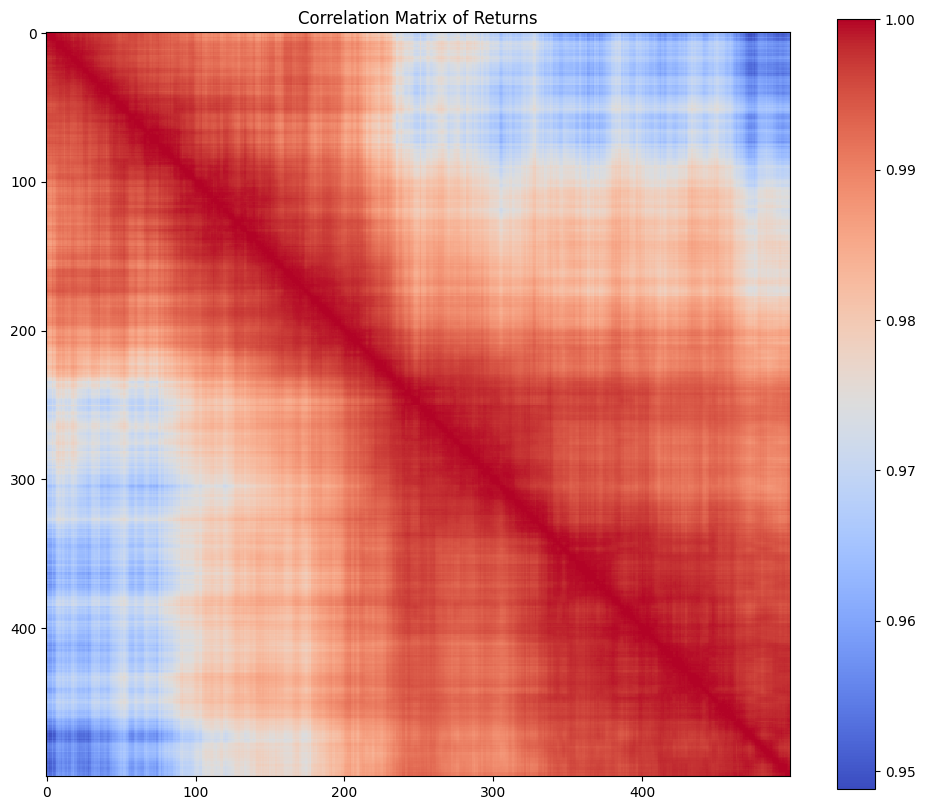

In [14]:
# Correlation matrix
corr_matrix = returns.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix of Returns')
plt.show()


## 5. Volatility

We'll calculate and plot the volatility (standard deviation of returns) for each instrument to identify which instruments are more volatile.


Instrument_0      1.039293
Instrument_1      1.047497
Instrument_2      1.048197
Instrument_3      1.050107
Instrument_4      1.048119
                    ...   
Instrument_495    1.319802
Instrument_496    1.312772
Instrument_497    1.296141
Instrument_498    1.298324
Instrument_499    1.299675
Length: 500, dtype: float64


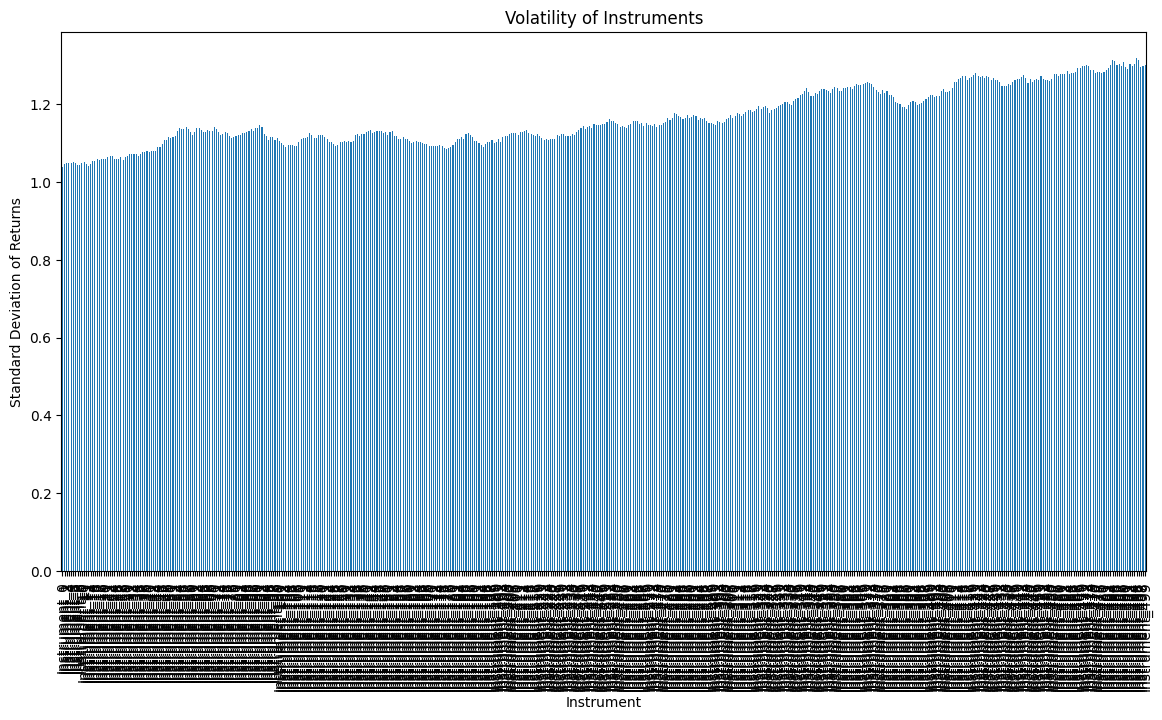

In [15]:
# Volatility (standard deviation of returns)
volatility = returns.std()
print(volatility)

# Plotting volatility
plt.figure(figsize=(14, 7))
volatility.plot(kind='bar')
plt.title('Volatility of Instruments')
plt.xlabel('Instrument')
plt.ylabel('Standard Deviation of Returns')
plt.show()
